In [1]:
#!pip install -e ecg_library

In [1]:
# Import necessary libraries
import os
import ecg_library

In [2]:
print(dir(ecg_library))

['CNNTransformerDetector', 'ECGBeatDataset', 'PQRST', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'analyze_anomalies', 'annotations', 'anomalies', 'beat_dataset', 'beat_detector', 'build_datasets', 'butter_bandpass', 'collate_fn', 'compute_loss', 'detect_beats', 'detect_pqt', 'detect_qrs', 'evaluate_detection', 'filters', 'get_annotation_status', 'load_annotations', 'load_ecg_data', 'parse_folder', 'save_annotation', 'save_rich_data', 'utils']


In [3]:
# Main loop to process each subfolder in the Data folder
data_dir = 'Data'
subfolders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

for subfolder in subfolders:
    full_path = os.path.join(data_dir, subfolder)
    csv_filename = os.path.join(full_path, f"{subfolder}_rich_processed_beats.csv")
    
    if os.path.exists(csv_filename):
        print(f"CSV already exists for {subfolder}. Skipping.")
        continue
    
    print(f"Processing {subfolder}...")  # Status update
    
    activity, start_time = ecg_library.utils.parse_folder(subfolder)
    combined_ecg_data, combined_time, fs, file_paths = ecg_library.utils.load_ecg_data(full_path)
    
    if len(combined_ecg_data) == 0:
        print(f"No data found in {subfolder}. Skipping.")
        continue
    
    filtered_ecg = ecg_library.filters.filter_signal(combined_ecg_data, fs)
    r_peaks, s_peaks, rr_intervals, mean_rr = ecg_library.PQRST.detect_qrs(filtered_ecg, fs)
    p_points, q_points, t_points = ecg_library.PQRST.detect_pqt(filtered_ecg, fs, r_peaks, s_peaks)
    all_beats, all_r_peaks, beat_types, all_rr_intervals, all_mean_rr, anomaly_segments, tp_anomalies = ecg_library.anomalies.analyze_anomalies(filtered_ecg, fs, combined_time, r_peaks, s_peaks, p_points, q_points, t_points)
    ecg_library.utils.save_rich_data(full_path, subfolder, start_time, combined_time, filtered_ecg, all_beats, beat_types, all_rr_intervals, file_paths, fs)
    
    print(f"Finished processing {subfolder}.")

print("All subfolders processed.")
# In case you need to reprocess due to changes in algo
# find . -name "*beats.csv" -type f -delete

CSV already exists for Sleep_on_20250614_233046_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for ECG_on_20250701_073548_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Walk_on_20250801_195604_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for ECG_on_20250613_073341_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Sleep_on_20250619_225207_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Activity_on_20250618_112241_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Walk_on_20250918_084256_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Activity_on_20250623_160217_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for ECG_on_20250613_073950_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for Rest_on_20260129_122847_by_Etienne_5010176_8CF6812E7FAF_RAWECG. Skipping.
CSV already exists for 

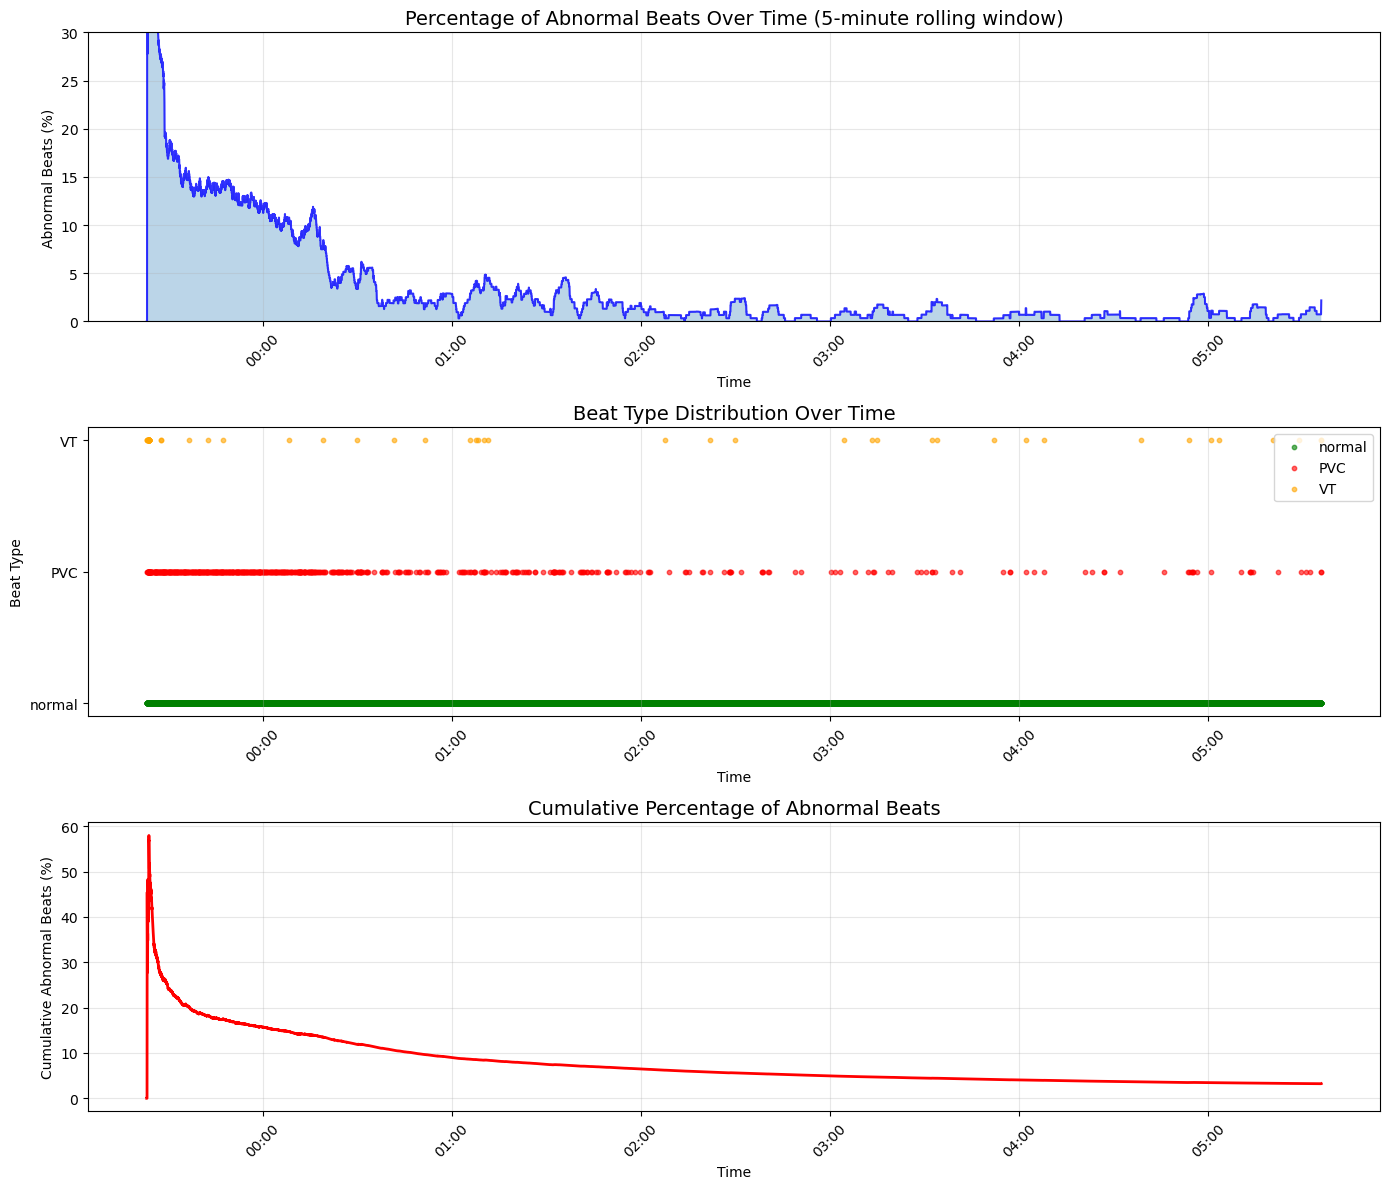


=== ECG ANALYSIS SUMMARY ===
Total beats analyzed: 22210
Recording duration: 0 days 06:12:39.360000

Beat Type Distribution:
  normal: 21492 (96.77%)
  PVC: 661 (2.98%)
  VT: 57 (0.26%)

Overall abnormal beat percentage: 3.23%
Maximum 5-minute abnormal percentage: 57.97%
Average 5-minute abnormal percentage: 3.49%

Periods with >20% abnormal beats (5-minute window):
  23:23:21 - 23:28:53: Max 58.0%


In [5]:
#CEll 16 From Claude.ai not Grok
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

folder = 'Walk_on_20250729_061603_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250729_183446_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250729_061603_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250729_090340_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250730_085712_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250730_070747_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250730_192004_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250731_094036_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250731_193113_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250803_211502_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Walk_on_20250802_223808_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Walk_on_20250801_195604_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250802_085724_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250802_151123_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250803_084416_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250801_092705_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250804_082631_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Walk_on_20250804_220633_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Walk_on_20250805_082442_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250805_230004_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Walk_on_20250806_113146_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Walk_on_20250809_083921_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20250927_222407_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251001_230212_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20250923_232759_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Hike_on_20250927_161207_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Rest_on_20251021_070342_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251025_133917_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251029_032549_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251027_224223_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Rest_on_20251029_091346_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder = 'Sleep_on_20251029_224800_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder ='ECG_on_20251030_080544_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251107_222311_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251109_205532_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Hike_on_20251110_154249_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
#folder ='Sleep_on_20251110_084327_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251107_222311_by_Vincent_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20251119_222341_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20260213_110947_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
folder = 'Sleep_on_20260127_232315_by_Etienne_5010176_8CF6812E7FAF_RAWECG'
# Read the CSV file
csv_filename=f'Data/{folder}/{folder}_rich_processed_beats.csv'
df = pd.read_csv(f'{csv_filename}')

# Convert the timestamp to datetime
df['abs_r_time'] = pd.to_datetime(df['abs_r_time'])

# Create a binary column for abnormal beats (1 if not Normal, 0 if Normal)
df['is_abnormal'] = (df['beat_type'] != 'normal').astype(int)

# Set the time window for rolling percentage calculation (e.g., 5 minutes)
window_minutes = 5

# Sort by time
df = df.sort_values('abs_r_time')

# Set timestamp as index for rolling calculations
df.set_index('abs_r_time', inplace=True)

# Calculate rolling percentage of abnormal beats
# Using a time-based window
rolling_window = f'{window_minutes}min'
df['abnormal_percentage'] = df['is_abnormal'].rolling(rolling_window).mean() * 100

# Also calculate cumulative statistics
df['cumulative_abnormal_count'] = df['is_abnormal'].cumsum()
df['cumulative_total_count'] = range(1, len(df) + 1)
df['cumulative_abnormal_percentage'] = (df['cumulative_abnormal_count'] / df['cumulative_total_count']) * 100

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Rolling percentage of abnormal beats over time
ax1.plot(df.index, df['abnormal_percentage'], 'b-', linewidth=1.5, alpha=0.8)
ax1.fill_between(df.index, df['abnormal_percentage'], alpha=0.3)
ax1.set_xlabel('Time')
ax1.set_ylabel(f'Abnormal Beats (%)')
ax1.set_title(f'Percentage of Abnormal Beats Over Time ({window_minutes}-minute rolling window)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 30)   # ← limit y-axis to 0–30%
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot 2: Beat type distribution over time
# Create scatter plot for different beat types
colors = {'normal': 'green', 'PVC': 'red', 'VT': 'orange', 
          'unlabeled': 'purple'}
for beat_type, color in colors.items():
    mask = df.index[df['beat_type'] == beat_type]
    if len(mask) > 0:
        ax2.scatter(mask, [beat_type] * len(mask), c=color, alpha=0.6, s=10, label=beat_type)

ax2.set_xlabel('Time')
ax2.set_ylabel('Beat Type')
ax2.set_title('Beat Type Distribution Over Time', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='x')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Plot 3: Cumulative abnormal percentage
ax3.plot(df.index, df['cumulative_abnormal_percentage'], 'r-', linewidth=2)
ax3.set_xlabel('Time')
ax3.set_ylabel('Cumulative Abnormal Beats (%)')
ax3.set_title('Cumulative Percentage of Abnormal Beats', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels for better readability
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== ECG ANALYSIS SUMMARY ===")
print(f"Total beats analyzed: {len(df)}")
print(f"Recording duration: {df.index[-1] - df.index[0]}")
print(f"\nBeat Type Distribution:")
beat_counts = df['beat_type'].value_counts()
for beat_type, count in beat_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {beat_type}: {count} ({percentage:.2f}%)")

print(f"\nOverall abnormal beat percentage: {(df['is_abnormal'].sum() / len(df)) * 100:.2f}%")
print(f"Maximum {window_minutes}-minute abnormal percentage: {df['abnormal_percentage'].max():.2f}%")
print(f"Average {window_minutes}-minute abnormal percentage: {df['abnormal_percentage'].mean():.2f}%")

# Find periods with high abnormal beat percentage
threshold = 20  # percentage
high_abnormal_periods = df[df['abnormal_percentage'] > threshold].copy()
if len(high_abnormal_periods) > 0:
    print(f"\nPeriods with >{threshold}% abnormal beats ({window_minutes}-minute window):")
    # Group consecutive high abnormal periods
    high_abnormal_periods['time_diff'] = high_abnormal_periods.index.to_series().diff()
    high_abnormal_periods['group'] = (high_abnormal_periods['time_diff'] > pd.Timedelta(minutes=window_minutes)).cumsum()
    
    for group_id, group_data in high_abnormal_periods.groupby('group'):
        start_time = group_data.index[0]
        end_time = group_data.index[-1]
        max_percentage = group_data['abnormal_percentage'].max()
        print(f"  {start_time.strftime('%H:%M:%S')} - {end_time.strftime('%H:%M:%S')}: Max {max_percentage:.1f}%")

In [43]:
root='/Users/emccullough/Projects/ecg_csv/Data/'

# --------------------------------------------------------------
#  Interactive ECG viewer – numerical order, no table, simple plot
# --------------------------------------------------------------
# !pip install ipywidgets   # run once if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt
from ipywidgets import Button, HBox, Output
from IPython.display import display, clear_output

# --------------------------------------------------------------
# 1. Load the beat-annotation CSV
# --------------------------------------------------------------
df = pd.read_csv(f'{root}{folder}/{folder}_rich_processed_beats.csv')

# (optional) convert absolute times – not needed for plotting
time_cols = ['abs_p_time','abs_q_time','abs_r_time','abs_s_time','abs_t_time']
for c in time_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# --------------------------------------------------------------
# 2. Build a list of filenames **in numerical order**
# --------------------------------------------------------------
# Assume filenames are like "1.csv", "2.csv", ..., "100.csv"
# Extract the leading number, cast to int, then sort.
def _numeric_key(fname):
    # strip extension and take the first integer part
    return int(''.join(filter(str.isdigit, fname.split('.')[0])))

all_files = sorted(df['filename'].unique(), key=_numeric_key)

# --------------------------------------------------------------
# 3. Helper: load + filter a single 20-s ECG file
# --------------------------------------------------------------
def load_ecg_file(fname):
    path = f"Data/{folder}/{fname}"
    raw = pd.read_csv(path, header=None, comment='#')[0].values
    t   = np.arange(len(raw)) / fs                 # seconds

    # # ---- same filtering you used before ----
    # b, a = butter_bandpass(0.5, 40.0, fs)          # you must have this function
    # sig  = filtfilt(b, a, raw)
    # kernel = int(fs * 0.5) + (1 if int(fs*0.5)%2==0 else 0)
    # sig  = sig - medfilt(sig, kernel_size=kernel)
    return t, raw

# --------------------------------------------------------------
# 4. Plotting routine
# --------------------------------------------------------------
out = Output()
idx = 0                                 # current file index

def plot_current():
    with out:
        clear_output(wait=True)
        if idx >= len(all_files):
            print("No more files.")
            return

        fname = all_files[idx]
        t, sig = load_ecg_file(fname)

        plt.figure(figsize=(15, 5))
        plt.plot(t, sig, 'k', lw=0.8, label='Filtered ECG')

        # beats that belong to this file
        beats = df[df['filename'] == fname]

        for _, b in beats.iterrows():
            # relative time inside the 20-s segment
            r_rel = (b['r_index'] % 2500) / fs
            p_rel = (b['p_index'] % 2500) / fs if pd.notnull(b['p_index']) else None
            q_rel = (b['q_index'] % 2500) / fs if pd.notnull(b['q_index']) else None
            s_rel = (b['s_index'] % 2500) / fs if pd.notnull(b['s_index']) else None
            t_rel = (b['t_index'] % 2500) / fs if pd.notnull(b['t_index']) else None

            if b['beat_type'] == 'normal':
                # green dot, no text
                plt.plot(r_rel, b['r_amplitude'], 'go',
                         label='Normal R' if 'Normal R' not in plt.gca().get_legend_handles_labels()[1] else '')
                continue

            # ---- abnormal beat ----
            r_amp = min(b['r_amplitude'], 950)               # cap for annotation
            plt.plot(r_rel, r_amp, 'ro',
                     label='Abnormal R' if 'Abnormal R' not in plt.gca().get_legend_handles_labels()[1] else '')
            plt.annotate(b['beat_type'], (r_rel, r_amp + 20),
                         color='red', fontsize=10, weight='bold')

            # P-Q-S-T points (only for abnormal beats)
            if p_rel is not None:
                plt.plot(p_rel, sig[int(b['p_index']%2500)], 'g.',
                         label='P' if 'P' not in plt.gca().get_legend_handles_labels()[1] else '')
            if q_rel is not None:
                plt.plot(q_rel, sig[int(b['q_index']%2500)], 'b.',
                         label='Q' if 'Q' not in plt.gca().get_legend_handles_labels()[1] else '')
            if s_rel is not None:
                plt.plot(s_rel, sig[int(b['s_index']%2500)], 'm.',
                         label='S' if 'S' not in plt.gca().get_legend_handles_labels()[1] else '')
            if t_rel is not None:
                plt.plot(t_rel, b['t_amplitude'], 'c.',
                         label='T' if 'T' not in plt.gca().get_legend_handles_labels()[1] else '')

        plt.title(f'File {idx+1}/{len(all_files)} – {fname}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.ylim(-1000, 1800)
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

# --------------------------------------------------------------
# 5. Navigation buttons
# --------------------------------------------------------------
prev_btn = Button(description="Previous")
next_btn = Button(description="Next")

def prev(_):
    global idx
    idx = max(0, idx - 1)
    plot_current()

def nxt(_):
    global idx
    idx = min(len(all_files)-1, idx + 1)
    plot_current()

prev_btn.on_click(prev)
next_btn.on_click(nxt)

# initial plot
plot_current()

# display controls + plot area
display(HBox([prev_btn, next_btn]), out)

Output()

In [34]:
# Cell: Interactive perusal of large RR intervals across all processed CSVs
# Install ipywidgets if needed: !pip install ipywidgets
import os
import glob
import re
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

from ipywidgets import interact, IntSlider, Output, Button, HBox, Dropdown, FloatSlider
from IPython.display import display, clear_output
from collections import defaultdict
from scipy.signal import filtfilt, medfilt, find_peaks
import matplotlib.pyplot as plt

In [35]:
# Define the bandpass filter function

# Function to parse folder for start time
def parse_start_time(subfolder):
    timestamp_match = re.search(r'_on_(.*?)_by_', subfolder)
    timestamp = timestamp_match.group(1) if timestamp_match else 'Unknown'
    try:
        start_time = datetime.strptime(timestamp, '%Y%m%d_%H%M%S')
    except:
        start_time = None
    return start_time

# Function to compute density DataFrame for a given df and RR threshold
def compute_density(df, rr_threshold):
    if df.empty:
        return pd.DataFrame()
    large_mask = df['rr_interval'] > rr_threshold
    large_rr_df = df[large_mask].copy()
    abnormal_count = large_rr_df['filename'].value_counts().reset_index(name='abnormal_count')
    abnormal_count.columns = ['filename', 'abnormal_count']
    
    # Compute streak stats per file
    file_streak_stats = defaultdict(lambda: {'consec_2': 0, 'consec_3': 0, 'consec_4': 0, 'consec_5plus': 0, 'max_streak': 0})
    unique_files = df['filename'].unique()
    for filename in unique_files:
        file_df = df[df['filename'] == filename]
        large_list = (file_df['rr_interval'] > rr_threshold).tolist()
        current_streak = 0
        max_streak = 0
        consec_2 = 0
        consec_3 = 0
        consec_4 = 0
        consec_5plus = 0
        for is_large in large_list:
            if is_large:
                current_streak += 1
                max_streak = max(max_streak, current_streak)
            else:
                if current_streak >= 5:
                    consec_5plus += 1
                elif current_streak == 4:
                    consec_4 += 1
                elif current_streak == 3:
                    consec_3 += 1
                elif current_streak == 2:
                    consec_2 += 1
                current_streak = 0
        # Check the last streak
        if current_streak >= 5:
            consec_5plus += 1
        elif current_streak == 4:
            consec_4 += 1
        elif current_streak == 3:
            consec_3 += 1
        elif current_streak == 2:
            consec_2 += 1
        file_streak_stats[filename]['consec_2'] = consec_2
        file_streak_stats[filename]['consec_3'] = consec_3
        file_streak_stats[filename]['consec_4'] = consec_4
        file_streak_stats[filename]['consec_5plus'] = consec_5plus
        file_streak_stats[filename]['max_streak'] = max_streak
    
    file_stats_df = pd.DataFrame([{'filename': fn, **stats} for fn, stats in file_streak_stats.items()])
    density = pd.merge(abnormal_count, file_stats_df, on='filename', how='left').fillna(0)
    return density

# Function to sort density based on mode
def get_sorted_density(sort_mode, density):
    if density.empty:
        return density
    if sort_mode == 'Most Consecutive Abnormal':
        return density.sort_values(by=['consec_5plus', 'max_streak', 'abnormal_count'], ascending=False).reset_index(drop=True)
    else:  # 'Most Abnormal'
        return density.sort_values(by='abnormal_count', ascending=False).reset_index(drop=True)

# Function to load and filter ECG file
def load_ecg_file(subfolder, filename):
    fp = f"Data/{subfolder}/{filename}"
    data = pd.read_csv(fp, header=None, comment='#')[0].values
    local_time = np.arange(len(data)) / fs  # Relative seconds in file
    
    # Apply same filtering as original (bandpass + baseline)
    b, a = ecg_library.filters.butter_bandpass(0.5, 40.0, fs)
    filtered_data = filtfilt(b, a, data)
    kernel_size = int(fs * 0.5) + (1 if int(fs * 0.5) % 2 == 0 else 0)
    baseline = medfilt(filtered_data, kernel_size=kernel_size)
    filtered_data -= baseline
    
    return local_time, filtered_data

In [40]:
# Load all processed CSVs
csv_files = glob.glob('Data/*/*_rich_processed_beats.csv')
all_dfs = {}
time_cols = ['abs_p_time', 'abs_q_time', 'abs_r_time', 'abs_s_time', 'abs_t_time']
fs = 125

for csv_path in csv_files:
    subfolder = os.path.basename(os.path.dirname(csv_path))
    df = pd.read_csv(csv_path)
    for col in time_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    all_dfs[subfolder] = df

# Get sorted subfolders by date
subfolder_dates = [(sf, parse_start_time(sf)) for sf in all_dfs.keys()]
subfolder_dates = [item for item in subfolder_dates if item[1] is not None]
subfolder_dates.sort(key=lambda x: x[1])
sorted_subfolders = [sf for sf, dt in subfolder_dates]

# Interactive widget setup
out = Output()
current_idx = 0
sort_mode = 'Most Abnormal'  # Default
rr_threshold = 1.5  # Initial threshold (parameter)
selected_subfolder = sorted_subfolders[0] if sorted_subfolders else None
density = pd.DataFrame()
sorted_density = pd.DataFrame()

# Dropdown for sort mode
sort_dropdown = Dropdown(options=['Most Abnormal', 'Most Consecutive Abnormal'], value=sort_mode, description='Sort By:')

# Slider for RR threshold
rr_slider = FloatSlider(value=rr_threshold, min=0.5, max=3.0, step=0.05, description='RR Thresh (s):')

# Dropdown for subfolder (session)
subfolder_dropdown = Dropdown(options=sorted_subfolders, value=selected_subfolder, description='Session:')

def update_density():
    global density, sorted_density
    if selected_subfolder and selected_subfolder in all_dfs:
        density = compute_density(all_dfs[selected_subfolder], rr_threshold)
        sorted_density = get_sorted_density(sort_mode, density)

def on_sort_change(change):
    global sort_mode
    sort_mode = change.new
    update_density()
    global current_idx
    current_idx = 0
    update_display()

def on_rr_change(change):
    global rr_threshold
    rr_threshold = change.new
    update_density()
    global current_idx
    current_idx = 0
    update_display()

def on_subfolder_change(change):
    global selected_subfolder, current_idx
    selected_subfolder = change.new
    update_density()
    current_idx = 0
    update_display()

sort_dropdown.observe(on_sort_change, names='value')
rr_slider.observe(on_rr_change, names='value')
subfolder_dropdown.observe(on_subfolder_change, names='value')

def update_display():
    with out:
        clear_output(wait=True)
        if sorted_density.empty:
            print("No files with large RR intervals found in this session.")
            return
        if current_idx < len(sorted_density):
            row = sorted_density.iloc[current_idx]
            filename = row['filename']
            count = row['abnormal_count']
            print(f"File {current_idx+1}/{len(sorted_density)} in {selected_subfolder}: {filename} - Large RR Events: {count}")
            
            # Additional streak info if sorting by consecutive
            if sort_mode == 'Most Consecutive Abnormal':
                consec_5plus = row['consec_5plus']
                max_streak = row['max_streak']
                print(f"  Sequences of 5+: {consec_5plus}, Max Streak: {max_streak}")
            
            # Table: Show large RR beats in this file
            df_sub = all_dfs[selected_subfolder]
            file_beats = df_sub[(df_sub['filename'] == filename) & (df_sub['rr_interval'] > rr_threshold)]
            display(file_beats[['filename', 'beat_type', 'abs_r_time', 'rr_interval', 'qrs_duration', 'qt_interval', 'r_amplitude']])
            
            # Plot the file with features
            seg_time, seg_data = load_ecg_file(selected_subfolder, filename)
            if len(seg_data) > 0:
                plt.figure(figsize=(15, 5))
                plt.plot(seg_time, seg_data, label='Filtered ECG')
                
                # Get all beats in this file
                all_file_beats = all_dfs[selected_subfolder][all_dfs[selected_subfolder]['filename'] == filename]
                
                # Plot points and annotations
                for _, beat in all_file_beats.iterrows():
                    is_large_rr = beat['rr_interval'] > rr_threshold if pd.notnull(beat['rr_interval']) else False
                    
                    # Calculate relative times from sample indices (precise)
                    r_rel = (beat['r_index'] % 2500) / fs  # Local rel time
                    p_rel = (beat['p_index'] % 2500) / fs if pd.notnull(beat['p_index']) else None
                    q_rel = (beat['q_index'] % 2500) / fs if pd.notnull(beat['q_index']) else None
                    s_rel = (beat['s_index'] % 2500) / fs if pd.notnull(beat['s_index']) else None
                    t_rel = (beat['t_index'] % 2500) / fs if pd.notnull(beat['t_index']) else None
                    
                    # For non-large RR: Green dot at R peak, no text
                    if not is_large_rr:
                        plt.plot(r_rel, beat['r_amplitude'], 'go', label='Normal R' if 'Normal R' not in plt.gca().get_legend_handles_labels()[1] else '')
                        continue  # Skip further plotting
                    
                    # For large RR: Red dot at R (cap at 950 if >950), text label
                    r_amp_plot = min(beat['r_amplitude'], 950)
                    plt.plot(r_rel, r_amp_plot, 'ro', label='Large RR R' if 'Large RR R' not in plt.gca().get_legend_handles_labels()[1] else '')
                    
                    # Annotate RR and type (at capped y + offset)
                    ann_color = 'red'
                    plt.annotate(f"Large RR: {beat['rr_interval']:.2f}s\nType: {beat['beat_type']}", (r_rel, r_amp_plot + 20), fontsize=8, color=ann_color, weight='bold')
                    
                    # Plot other points for large RR beats
                    # P (green)
                    if p_rel is not None:
                        p_amp = seg_data[int(beat['p_index'] % 2500)]
                        plt.plot(p_rel, p_amp, 'g.', label='P Waves' if 'P Waves' not in plt.gca().get_legend_handles_labels()[1] else '')
                    
                    # Q (blue)
                    if q_rel is not None:
                        q_amp = seg_data[int(beat['q_index'] % 2500)]
                        plt.plot(q_rel, q_amp, 'bo', label='Q Points' if 'Q Points' not in plt.gca().get_legend_handles_labels()[1] else '')
                    
                    # S (magenta)
                    if s_rel is not None:
                        s_amp = seg_data[int(beat['s_index'] % 2500)]
                        plt.plot(s_rel, s_amp, 'mo', label='S Points' if 'S Points' not in plt.gca().get_legend_handles_labels()[1] else '')
                    
                    # T (cyan)
                    if t_rel is not None:
                        plt.plot(t_rel, beat['t_amplitude'], 'co', label='T Waves' if 'T Waves' not in plt.gca().get_legend_handles_labels()[1] else '')
                
                plt.xlabel('Relative Time (s)')
                plt.ylabel('Amplitude')
                plt.title(f'ECG File: {selected_subfolder}/{filename}')
                plt.legend()
                plt.grid(True)
                plt.ylim(-1000, 1000)  # Fixed y-axis
                plt.show()
            else:
                print("No data loaded for plot.")
        else:
            print("No more files.")

# Buttons for navigation
prev_button = Button(description="Previous")
next_button = Button(description="Next")

def on_prev(b):
    global current_idx
    current_idx = max(0, current_idx - 1)
    update_display()

def on_next(b):
    global current_idx
    current_idx = min(len(sorted_density)-1, current_idx + 1)
    update_display()

prev_button.on_click(on_prev)
next_button.on_click(on_next)

# Initial setup
if sorted_subfolders:
    update_density()
    update_display()
    display(HBox([prev_button, next_button, sort_dropdown, subfolder_dropdown, rr_slider]), out)
else:
    print("No sessions found.")

Output()

In [37]:
# New Analysis to find abnormal peaks. Is double peaked R Peak new?

In [14]:
# Step 5: Analyze T-P/T-R intervals, detect anomalies, and classify peaks (PVC/VT/unlabeled) in anomalous regions

# Function to analyze anomalies and classify beats
def analyze_anomalies(filtered_ecg, fs, combined_time, r_peaks, s_peaks, p_points, q_points, t_points):

    tp_intervals = []
    tp_energies = []
    tp_anomalies = []
    anomaly_segments = []
    all_beats = []  # CHANGED: Initialize as empty; populate with full dicts below
    
    # CHANGED: Initialize normal beats with all parameters
    for i, r_pos in enumerate(r_peaks):
        all_beats.append({
            'r_position': r_pos,  # CHANGED: Renamed 'position' to 'r_position' for clarity, but you can keep 'position' if preferred
            'type': 'normal',
            's_position': s_peaks[i],
            'p_position': p_points[i],
            'q_position': q_points[i],
            't_position': t_points[i],
            'energy': None,
            'fwhm': None
        })
    
    energy_threshold = 60
    pvc_threshold_amp = 400  # Amplitude for PVC
    pvc_fwhm_threshold = 0.06  # FWHM threshold for PVC (seconds) - adjusted as per your correction
    vt_neg_threshold = -400  # Negative amplitude for VT
    vt_pos_threshold = 200   # Following positive amplitude for VT
    vt_max_distance = int(0.3 * fs)  # 100ms window for VT negative-to-positive
    min_peak_distance = int(0.04 * fs)  # 40ms min distance to prevent close duplicate peaks
    unlabeled_threshold_amp = 200  # Amplitude for unlabeled positive peaks (if not PVC)
    
    for i in range(len(t_points) - 1):
        if t_points[i] is None:
            continue
        
        # Define interval boundaries
        interval_start = t_points[i]
        if i + 1 < len(p_points) and p_points[i + 1] is not None:
            interval_end = p_points[i + 1]
            interval_type = 'T-P'
        else:
            interval_end = r_peaks[i + 1] if i + 1 < len(r_peaks) else None
            interval_type = 'T-R'
        
        if interval_end is None or interval_start >= interval_end:
            continue
        
        # Extract segment
        segment = filtered_ecg[interval_start:interval_end]
        seg_len = len(segment)
        
        # Calculate energy (absolute integral)
        energy = np.sum(np.abs(segment)) / fs  # Normalized by time
        
        tp_intervals.append((interval_start, interval_end, interval_type))
        tp_energies.append(energy)
        
        # Check for anomalies
        is_anomaly = False
        anomaly_type = None
        anomaly_peaks = []  # CHANGED: Fixed typo from 'anomaly_peaks' to 'anomaly_peaks' for consistency (was already correct, but ensuring)
        
        if energy > energy_threshold:
            is_anomaly = True
            anomaly_type = 'High Energy'
            
            # Analyze peaks within the anomalous region, with min distance to avoid close duplicates
            pos_peaks_rel, pos_props = find_peaks(segment, height=100, prominence=50, distance=min_peak_distance)
            pos_heights = pos_props['peak_heights']
            neg_peaks_rel, neg_props = find_peaks(-segment, height=100, prominence=50, distance=min_peak_distance)
            neg_heights = -neg_props['peak_heights']
            
            # Track used positive peaks for VT to exclude from PVC
            used_pos_peaks = set()
            used_neg_peaks = set()  # Optional: if you want to track used negative peaks
            
            # First, check for VT patterns (large negative followed by positive)
            for n_idx, n_rel in enumerate(neg_peaks_rel):
                n_amp = neg_heights[n_idx]
                if n_amp >= vt_neg_threshold:
                    continue
                p_cands = pos_peaks_rel[(pos_peaks_rel > n_rel) & (pos_peaks_rel <= n_rel + vt_max_distance)]
                if len(p_cands) > 0:
                    p_rel = p_cands[0]
                    p_amp = pos_heights[np.where(pos_peaks_rel == p_rel)[0][0]]
                    if p_amp > vt_pos_threshold:
                        vt_pos = interval_start + n_rel
                        vt_start = max(0, interval_start + n_rel - int(0.05 * fs))
                        vt_end = min(len(filtered_ecg), interval_start + p_rel + int(0.05 * fs))
                        vt_energy = np.sum(np.abs(filtered_ecg[vt_start:vt_end])) / fs
                        if vt_pos not in [b.get('r_position') for b in all_beats]:  # CHANGED: Check 'r_position'
                            all_beats.append({
                                'r_position': vt_pos,  # VT negative peak as "R-like" position
                                'type': 'VT',
                                's_position': interval_start + p_rel,  # Positive peak as 's_position'
                                'p_position': None,
                                'q_position': None,
                                't_position': None,
                                'energy': vt_energy,
                                'fwhm': None
                            })
                            anomaly_peaks.append({
                                'type': 'VT',
                                'time': combined_time[vt_pos],
                                'amplitude': n_amp,
                                'energy': vt_energy
                            })
                            used_pos_peaks.add(p_rel)
                            used_neg_peaks.add(n_rel)  # Mark negative as used
            
            # Check for PVC (large positive with wide FWHM)
            for p_idx, p_rel in enumerate(pos_peaks_rel):
                if p_rel in used_pos_peaks:
                    continue
                p_amp = pos_heights[p_idx]
                if p_amp <= pvc_threshold_amp:
                    continue
                half = p_amp / 2
                left = p_rel - 1
                while left >= 0 and segment[left] >= half:
                    left -= 1
                if left >= 0:
                    left += (half - segment[left]) / (segment[left + 1] - segment[left])
                right = p_rel + 1
                while right < seg_len and segment[right] >= half:
                    right += 1
                if right < seg_len:
                    right -= (segment[right - 1] - half) / (segment[right - 1] - segment[right])
                fwhm = (right - left) / fs
                if fwhm > pvc_fwhm_threshold:
                    pvc_pos = interval_start + p_rel
                    left_idx = int(interval_start + left)
                    right_idx = int(interval_start + right)
                    pvc_energy = np.sum(np.abs(filtered_ecg[left_idx:right_idx])) / fs
                    if pvc_pos not in [b.get('r_position') for b in all_beats]:  # CHANGED: Check 'r_position'
                        all_beats.append({
                            'r_position': pvc_pos,
                            'type': 'PVC',
                            's_position': None,
                            'p_position': None,
                            'q_position': None,
                            't_position': None,
                            'energy': pvc_energy,
                            'fwhm': fwhm
                        })
                        anomaly_peaks.append({
                            'type': 'PVC',
                            'time': combined_time[pvc_pos],
                            'amplitude': p_amp,
                            'fwhm': fwhm,
                            'energy': pvc_energy
                        })
                        used_pos_peaks.add(p_rel)  # Mark as used to avoid unlabeled
            
            # Add unlabeled for remaining significant positive peaks
            for p_idx, p_rel in enumerate(pos_peaks_rel):
                if p_rel in used_pos_peaks:
                    continue
                p_amp = pos_heights[p_idx]
                if p_amp <= unlabeled_threshold_amp:
                    continue
                # Compute FWHM for unlabeled as well
                half = p_amp / 2
                left = p_rel - 1
                while left >= 0 and segment[left] >= half:
                    left -= 1
                if left >= 0:
                    left += (half - segment[left]) / (segment[left + 1] - segment[left])
                right = p_rel + 1
                while right < seg_len and segment[right] >= half:
                    right += 1
                if right < seg_len:
                    right -= (segment[right - 1] - half) / (segment[right - 1] - segment[right])
                fwhm = (right - left) / fs
                unlabeled_pos = interval_start + p_rel
                left_idx = int(interval_start + left)
                right_idx = int(interval_start + right)
                unlabeled_energy = np.sum(np.abs(filtered_ecg[left_idx:right_idx])) / fs
                if unlabeled_pos not in [b.get('r_position') for b in all_beats]:
                    all_beats.append({
                        'r_position': unlabeled_pos,
                        'type': 'unlabeled',
                        's_position': None,
                        'p_position': None,
                        'q_position': None,
                        't_position': None,
                        'energy': unlabeled_energy,
                        'fwhm': fwhm
                    })
                    anomaly_peaks.append({
                        'type': 'unlabeled',
                        'time': combined_time[unlabeled_pos],
                        'amplitude': p_amp,
                        'fwhm': fwhm,
                        'energy': unlabeled_energy
                    })
        
        if is_anomaly:
            tp_anomalies.append(i)
            anomaly_segments.append({
                'start': interval_start,
                'end': interval_end,
                'type': anomaly_type,
                'energy': energy,
                'interval_type': interval_type,
                'peaks': anomaly_peaks
            })
    
    # Sort all beats by position
    all_beats.sort(key=lambda x: x['r_position'])  # CHANGED: Sort by 'r_position'
    all_r_peaks = np.array([b['r_position'] for b in all_beats])  # CHANGED: Use 'r_position'
    beat_types = [b['type'] for b in all_beats]
    
    # # Print results
    # print(f"\nT-P/T-R Interval Analysis:")
    # print(f"Total intervals analyzed: {len(tp_intervals)}")
    # print(f"Anomalies detected: {len(tp_anomalies)}")
    # if tp_energies:
    #     print(f"Mean energy: {np.mean(tp_energies):.2f}")
    #     print(f"Max energy: {np.max(tp_energies):.2f}")
    
    # if anomaly_segments:
    #     print("\nAnomaly Details:")
    #     for i, anom in enumerate(anomaly_segments[:10]):
    #         print(f"  Anomaly {i+1}: {anom['type']} in {anom['interval_type']} interval")
    #         print(f"    Time: {anom['start']/fs:.2f}s - {anom['end']/fs:.2f}s")
    #         print(f"    Energy: {anom['energy']:.2f}")
    #         if anom['peaks']:
    #             print(f"    Peaks detected:")
    #             for peak in anom['peaks']:
    #                 print(f"      {peak['type']} at {peak['time']:.2f}s, Amplitude: {peak['amplitude']:.2f}, Energy: {peak['energy']:.2f}", end="")
    #                 if peak.get('fwhm'):
    #                     print(f", FWHM: {peak['fwhm']:.3f}s")
    #                 else:
    #                     print()
    
    # print(f"\nHeartbeat Classification:")
    # print(f"Total main beats: {len(r_peaks)}")
    # print(f"Extra beats (PVC/VT/unlabeled) detected: {len([b for b in all_beats if b['type'] != 'normal'])}")
    # print(f"Total beats: {len(all_r_peaks)}")
    # print(f"First 10 beat types: {beat_types[:10]}")
    
    # Optional: Recalculate RR intervals based on normal beats only
    normal_indices = [idx for idx, typ in enumerate(beat_types) if typ == 'normal']
    normal_r_peaks = all_r_peaks[normal_indices]
    normal_rr_intervals = np.diff(normal_r_peaks) / fs if len(normal_r_peaks) > 1 else np.array([])
    normal_mean_rr = np.mean(normal_rr_intervals) if len(normal_rr_intervals) > 0 else np.nan
    # print(f"\nUpdated Mean RR interval (normal beats only): {normal_mean_rr:.3f} seconds")
    # print(f"Updated Heart rate (normal beats only): {60/normal_mean_rr:.1f} bpm" if not np.isnan(normal_mean_rr) else "N/A")
    
        
      
        
    all_rr_intervals = np.diff(all_r_peaks) / fs
    all_mean_rr = np.mean(all_rr_intervals) if len(all_rr_intervals) > 0 else np.nan
    return all_beats, all_r_peaks, beat_types, all_rr_intervals, all_mean_rr, anomaly_segments, tp_anomalies

In [39]:
# Cell: Interactive RR Interval Plot with CSV Selection
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import glob
import os

# Find all relevant CSV files (assuming they end with '_rich_processed_beats.csv')
csv_files = glob.glob('Data/*/*_rich_processed_beats.csv')  # Adjust path if CSVs are in a specific folder, e.g., 'Data/*_rich_processed_beats.csv'

# Sort files for consistent order
csv_files.sort()

# Function to plot RR intervals for a selected CSV
def plot_rr_intervals(csv_file):
    if not csv_file:
        print("No file selected.")
        return
    
    # Load the CSV
    df = pd.read_csv(csv_file)
    
    # Ensure 'abs_r_time' is datetime and 'rr_interval' is numeric
    df['abs_r_time'] = pd.to_datetime(df['abs_r_time'], errors='coerce')
    df['rr_interval'] = pd.to_numeric(df['rr_interval'], errors='coerce')
    
    # Drop rows with invalid RR or time
    df = df.dropna(subset=['abs_r_time', 'rr_interval'])
    
    if df.empty:
        print(f"No valid data in {csv_file}.")
        return
    
    # Plot
    plt.figure(figsize=(15, 6))
    plt.plot(df['abs_r_time'], df['rr_interval'], linestyle='-', color='b', label='RR Interval')
    plt.xlabel('Time')
    plt.ylabel('RR Interval (s)')
    plt.title(f'RR Interval Variation Over Time - {os.path.basename(csv_file)}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Dropdown widget for file selection
file_dropdown = Dropdown(options=[''] + csv_files, description='Select CSV:')

# Interactive plot
interact(plot_rr_intervals, csv_file=file_dropdown);

interactive(children=(Dropdown(description='Select CSV:', options=('', 'Data/Activity_on_20240810_153545_by_Et…

In [38]:
root='/Users/emccullough/Projects/ecg_csv/Data/'
#folder='Sleep_on_20251027_224223_by_Etienne_5010176_8CF6812E7FAF_RAWECG'

# --------------------------------------------------------------
#  Interactive ECG viewer – numerical order, no table, simple plot
# --------------------------------------------------------------
# !pip install ipywidgets   # run once if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt
from ipywidgets import Button, HBox, Output
from IPython.display import display, clear_output

# --------------------------------------------------------------
# 1. Load the beat-annotation CSV
# --------------------------------------------------------------
df = pd.read_csv(f'{root}{folder}/{folder}_rich_processed_beats.csv')

# (optional) convert absolute times – not needed for plotting
time_cols = ['abs_p_time','abs_q_time','abs_r_time','abs_s_time','abs_t_time']
for c in time_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# --------------------------------------------------------------
# 2. Build a list of filenames **in numerical order**
# --------------------------------------------------------------
# Assume filenames are like "1.csv", "2.csv", ..., "100.csv"
# Extract the leading number, cast to int, then sort.
def _numeric_key(fname):
    # strip extension and take the first integer part
    return int(''.join(filter(str.isdigit, fname.split('.')[0])))

all_files = sorted(df['filename'].unique(), key=_numeric_key)

# --------------------------------------------------------------
# 3. Helper: load + filter a single 20-s ECG file
# --------------------------------------------------------------
def load_ecg_file(fname):
    path = f"Data/{folder}/{fname}"
    raw = pd.read_csv(path, header=None, comment='#')[0].values
    t   = np.arange(len(raw)) / fs                 # seconds

    # # ---- same filtering you used before ----
    # b, a = butter_bandpass(0.5, 40.0, fs)          # you must have this function
    # sig  = filtfilt(b, a, raw)
    # kernel = int(fs * 0.5) + (1 if int(fs*0.5)%2==0 else 0)
    # sig  = sig - medfilt(sig, kernel_size=kernel)
    return t, raw

# --------------------------------------------------------------
# 4. Plotting routine
# --------------------------------------------------------------
out = Output()
idx = 0                                 # current file index

def plot_current():
    with out:
        clear_output(wait=True)
        if idx >= len(all_files):
            print("No more files.")
            return

        fname = all_files[idx]
        t, sig = load_ecg_file(fname)

        plt.figure(figsize=(15, 5))
        plt.plot(t, sig, 'k', lw=0.8, label='Filtered ECG')

        # beats that belong to this file
        beats = df[df['filename'] == fname]

        for _, b in beats.iterrows():
            # relative time inside the 20-s segment
            r_rel = (b['r_index'] % 2500) / fs
            p_rel = (b['p_index'] % 2500) / fs if pd.notnull(b['p_index']) else None
            q_rel = (b['q_index'] % 2500) / fs if pd.notnull(b['q_index']) else None
            s_rel = (b['s_index'] % 2500) / fs if pd.notnull(b['s_index']) else None
            t_rel = (b['t_index'] % 2500) / fs if pd.notnull(b['t_index']) else None

            if b['beat_type'] == 'normal':
                # green dot, no text
                plt.plot(r_rel, b['r_amplitude'], 'go',
                         label='Normal R' if 'Normal R' not in plt.gca().get_legend_handles_labels()[1] else '')
                continue

            # ---- abnormal beat ----
            r_amp = min(b['r_amplitude'], 950)               # cap for annotation
            plt.plot(r_rel, r_amp, 'ro',
                     label='Abnormal R' if 'Abnormal R' not in plt.gca().get_legend_handles_labels()[1] else '')
            plt.annotate(b['beat_type'], (r_rel, r_amp + 20),
                         color='red', fontsize=10, weight='bold')

            # P-Q-S-T points (only for abnormal beats)
            if p_rel is not None:
                plt.plot(p_rel, sig[int(b['p_index']%2500)], 'g.',
                         label='P' if 'P' not in plt.gca().get_legend_handles_labels()[1] else '')
            if q_rel is not None:
                plt.plot(q_rel, sig[int(b['q_index']%2500)], 'b.',
                         label='Q' if 'Q' not in plt.gca().get_legend_handles_labels()[1] else '')
            if s_rel is not None:
                plt.plot(s_rel, sig[int(b['s_index']%2500)], 'm.',
                         label='S' if 'S' not in plt.gca().get_legend_handles_labels()[1] else '')
            if t_rel is not None:
                plt.plot(t_rel, b['t_amplitude'], 'c.',
                         label='T' if 'T' not in plt.gca().get_legend_handles_labels()[1] else '')

        plt.title(f'File {idx+1}/{len(all_files)} – {fname}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.ylim(-1000, 1000)
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

# --------------------------------------------------------------
# 5. Navigation buttons
# --------------------------------------------------------------
prev_btn = Button(description="Previous")
next_btn = Button(description="Next")

def prev(_):
    global idx
    idx = max(0, idx - 1)
    plot_current()

def nxt(_):
    global idx
    idx = min(len(all_files)-1, idx + 1)
    plot_current()

prev_btn.on_click(prev)
next_btn.on_click(nxt)

# initial plot
plot_current()

# display controls + plot area
display(HBox([prev_btn, next_btn]), out)

Output()